In [1]:
import pandas as pd
file_path = '/Users/syedkazmi/Desktop/Data.csv'
data = pd.read_csv(file_path)
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN


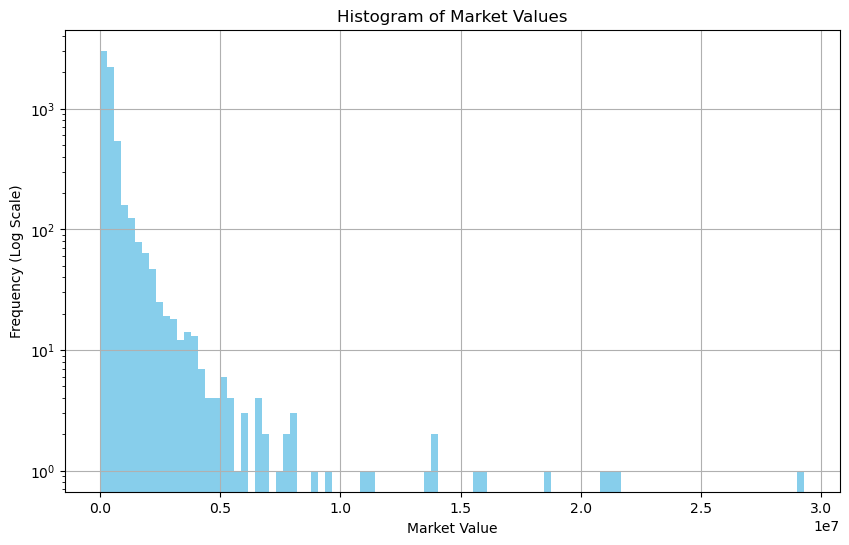

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Sale Amount'].dropna(), bins=100, color='skyblue', log=True)
plt.title('Histogram of Market Values')
plt.xlabel('Market Value')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

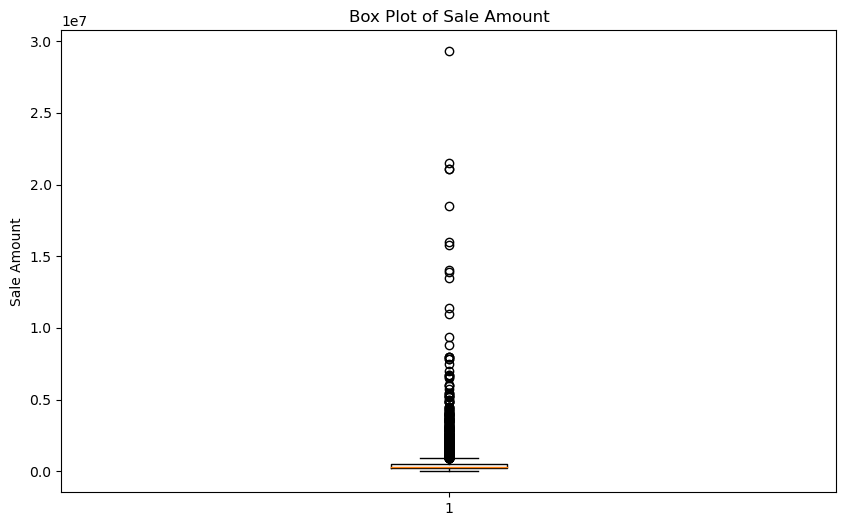

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/syedkazmi/Desktop/Data.csv')

# Create a box plot for 'Sale Amount'
plt.figure(figsize=(10, 6))
plt.boxplot(data['Sale Amount'].dropna())  # Remove NaN values for plotting
plt.title('Box Plot of Sale Amount')
plt.ylabel('Sale Amount')
plt.show()


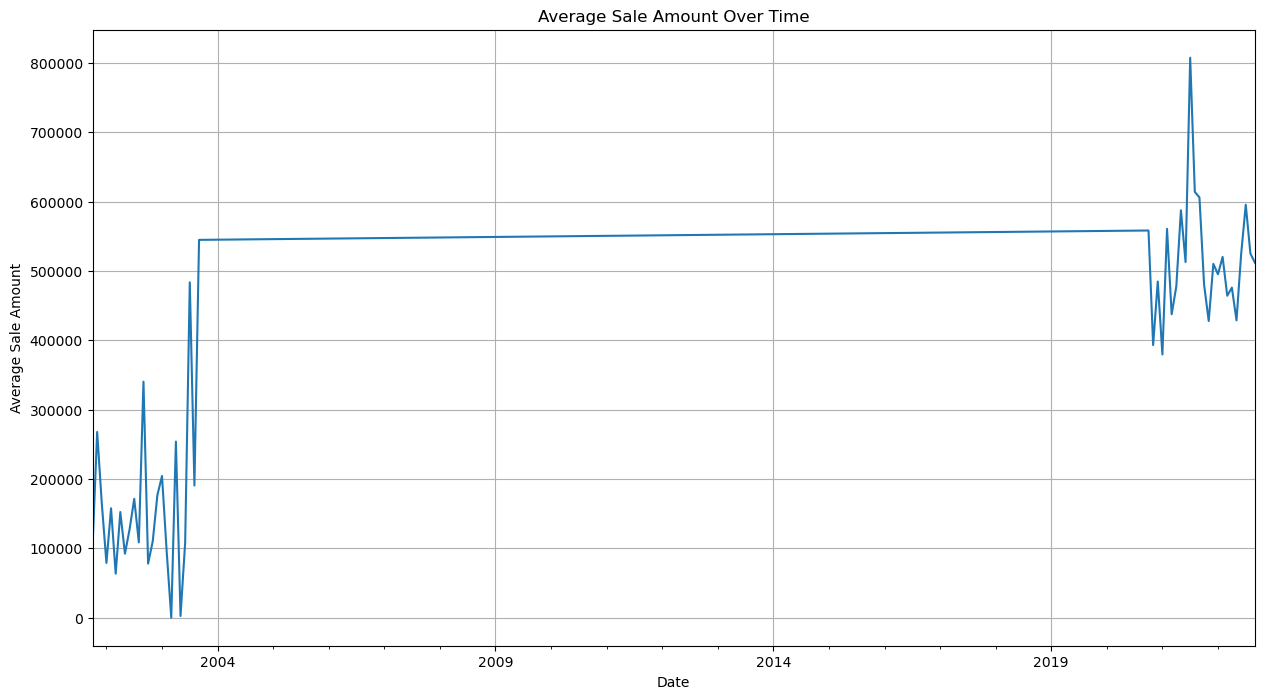

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/syedkazmi/Desktop/Data.csv')

# Ensure 'Date Recorded' is a datetime type
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])

# Group by date and calculate the average sale amount
average_sales_over_time = data.groupby(data['Date Recorded'].dt.to_period("M"))['Sale Amount'].mean()

# Plotting
plt.figure(figsize=(15, 8))
average_sales_over_time.plot(kind='line')
plt.title('Average Sale Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sale Amount')
plt.grid(True)
plt.show()


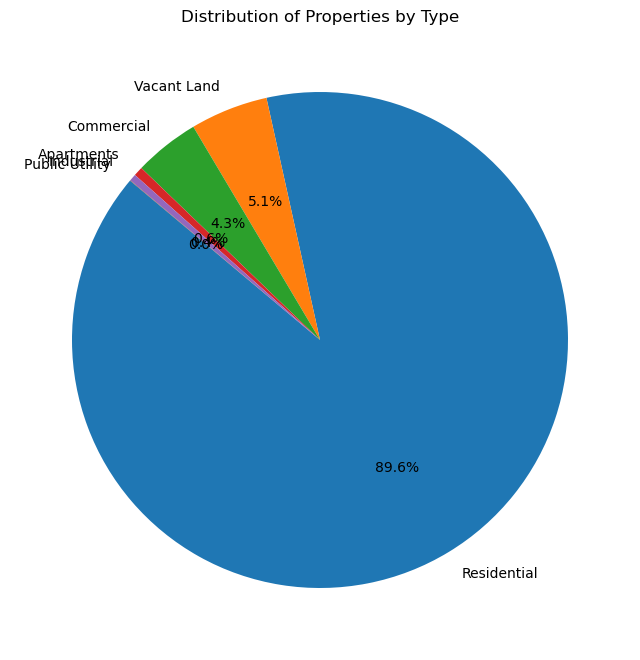

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/syedkazmi/Desktop/Data.csv')

# Grouping data by 'Property Type' and counting the number of each type
property_type_counts = data['Property Type'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 30))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Properties by Type')
plt.show()


## Data Preprocessing & Feature Engineering

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

selected_features = ['Town', 'Property Type', 'Serial Number', 'List Year', 'Sale Amount']  
data_selected = data[selected_features]

numerical_cols = ['Serial Number', 'List Year']
categorical_cols = ['Town', 'Property Type']

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

data_preprocessed = preprocessor.fit_transform(data_selected)

y = data_selected['Sale Amount']
X = data_selected.drop(['Sale Amount'], axis=1)
X_preprocessed = preprocessor.transform(X)
X_preprocessed.shape, y.shape

((6389, 159), (6389,))

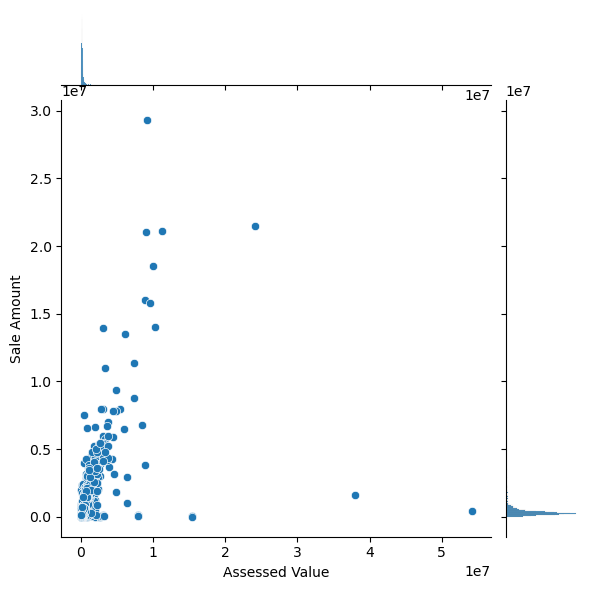

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/syedkazmi/Desktop/Data.csv')

# Create a JointGrid with a scatter plot and histograms
g = sns.JointGrid(x="Assessed Value", y="Sale Amount", data=data)
g = g.plot(sns.scatterplot, sns.histplot)

plt.show()


## Model Building

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you have X_preprocessed and y from the previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results

{'Linear Regression': {'MSE': 998520113750.8461, 'R2': -0.0002862979168587465},
 'Decision Tree': {'MSE': 1147512323795.6128, 'R2': -0.14954204564966633},
 'Random Forest': {'MSE': 1026269978167.5317, 'R2': -0.028085246343437342},
 'Gradient Boosting': {'MSE': 916415130801.6655, 'R2': 0.0819639124732503}}

Construction of Test Dataset and Evaluation of Model

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path =  '/Users/syedkazmi/Desktop/Data.csv'
data = pd.read_csv(file_path)

# Sort the data by date and select the most recent data for the test set
# Replace 'Date Recorded' with the actual date field in your dataset
data_sorted = data.sort_values(by='Date Recorded', ascending=False)
test_data_size = int(0.2 * len(data_sorted))  # e.g., 20% of the data as test set
test_data = data_sorted.head(test_data_size)

# Preprocess the test data as need to adjust preprocessing steps based on your dataset)


X_test = test_data.drop('Sale Amount', axis=1)  # Replace 'Sale Amount' with your target column
y_test = test_data['Sale Amount']
X_test_preprocessed = preprocessor.transform(X_test)

# Load your trained model
# Assuming your model is named `trained_model`


gradient_boosting_model = models['Gradient Boosting']

# Predict on the test set and evaluate
y_pred = gradient_boosting_model.predict(X_test_preprocessed)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_squared_error(y_test, y_pred)  # Mean Absolute Error

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")




RMSE: 580768.3288161326
MAE: 337291851755.88354
